#### EP4130: Data Science Analysis

#### Assignment 6

#### Tanmay Goyal- AI20BTECH11021

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import emcee
!pip install astroml
from astroML.plotting import plot_mcmc

**Question 1**

Einstein's theory predicts a value of 1.74 arcseconds for light-deflection, whereas Newtonian Gravity predicts a value of exactly half of that. Eddington's team obtained a value of 1.61 $\pm$ 40 arcseconds, whereas Crommelin's team obtained a value of 1.98 $\pm$ 0.16 arcseconds. Calculate the Bayes factor between Einstein's Theory and Newtonian Gravity, assuming Gaussian Likelyhoods.

In [84]:
einstein_time = 1.74
newton_time = einstein_time / 2
eddington_time = 1.61
eddington_error = 0.40
crommelin_time = 1.98
crommelin_error = 0.16

# Bayes Factor = ratios of evidence of the models, i.e seeing the data given the model
# considering the models of einstein and newton, we can center the data around their repsective means with
# the spread equal to error, and find the probabilities of obtaining crommelin and eddingtons values

einstein_evidence = sp.stats.norm(einstein_time, eddington_error).pdf(eddington_time) * \
                    sp.stats.norm(einstein_time, crommelin_error).pdf(crommelin_time)

newton_evidence = sp.stats.norm(newton_time, eddington_error).pdf(eddington_time) * \
                    sp.stats.norm(newton_time, crommelin_error).pdf(crommelin_time)

print("The Bayes Factor for the models of Einstein and Netwon are {} in favour of Einstein's model.".format(einstein_evidence/newton_evidence))

The Bayes Factor for the models of Einstein and Netwon are 48164622958.34179 in favour of Einstein's model.


**Question 2**

For exercise 1 in arXiv:1008.4686, calculate the 68% and 95% joint confidence intervals on $b$ and $m$.

In [85]:
def linear_model(x , theta):
    '''
    Applies the linear model: y = theta_0 + theta_1 * x
    '''

    if len(theta) != 2:
        print("Incorrect size of parameters")
        return 
    
    return theta[0] + theta[1] * x

In [86]:
data = [[203,495,21,],
[58,173,15,],
[210,479,27,],
[202,504,14,],
[198,510,30,],
[158,416,16,],
[165,393,14,],
[201,442,25,],
[157,317,52,],
[131,311,16,],
[166,400,34,],
[160,337,31,],
[186,423,42,],
[125,334,26,],
[218,533,16,],
[146,344,22]]

data = np.array(data)

x = data[: , 0]
y = data[: , 1]
e = data[: , 2]


In [87]:
def log_prior(theta):
    '''
    Calculates the log prior for the parameters of the model
    '''

    if theta[2] < 0:
        return -np.inf
    else:
        return -1.5 * np.log((1 + theta[1]**2) / theta[2])

def log_likelihood(theta , x , y, e):
    '''
    Calculates the log likelihood for the parameters of the model
    '''
    y_pred = linear_model(x , theta[:2])
    return -0.5 * np.sum(np.log(2 * np.pi * theta[2]**2) + ((y - y_pred)**2 / theta[2]**2))

def log_posterior(theta , x , y , e):
    '''
    Calculates the log posterior for the parameters of the model
    '''

    return log_prior(theta) + log_likelihood(theta , x , y , e)

In [88]:
n_walkers = 50
n_burn = 10000
n_steps = 15000
n_dim = 3

# intial guess
starting_guess = np.random.normal(0 , 1 , (n_walkers , n_dim))

sampler = emcee.EnsembleSampler(n_walkers , n_dim , log_posterior , args = (x , y , e))
sampler.run_mcmc(starting_guess , n_steps)

chain = sampler.chain[: , n_burn: , :].reshape((-1 , n_dim))

/Users/tanmaygoyal/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


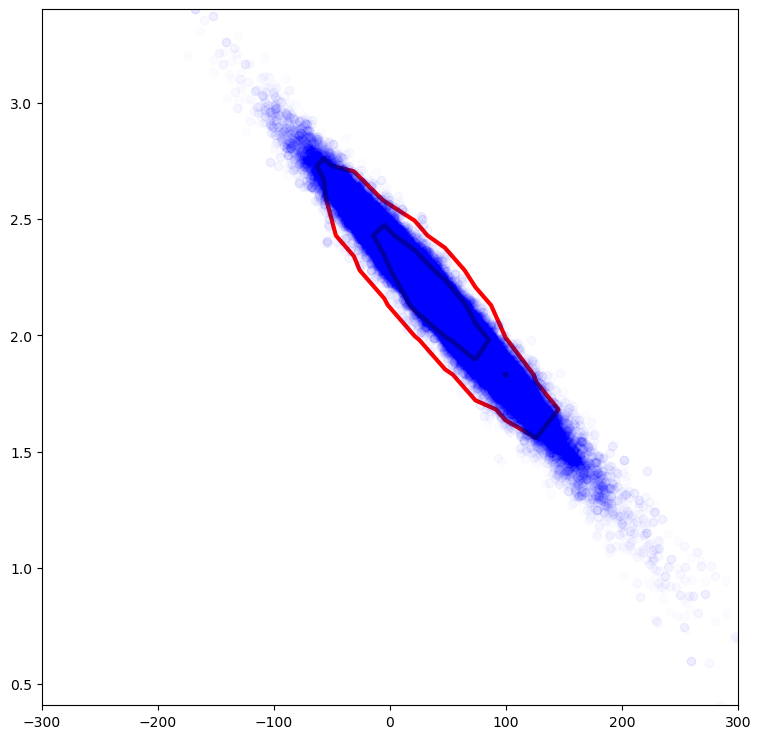

In [89]:
plot_mcmc(chain.T[:2 , :] , colors = ['r'  , 'r'] , linewidths = [3,3])
plt.plot(chain[:,0] , chain[:,1] , 'bo' , alpha = 0.01)
plt.xlim(-300 , 300)
plt.show()

**Question 3**

Fit the data in Table 1 in arXiv:1008.4686 to a straight line, after including all the data points(excluding $\sigma_x$ and $\rho_{xy}$), using both maximum likelyhood estimation  as well as Bayesian Analysis to identify outliers. Show the results in a plot.

**Answer**

$\underline{\text{Maximum Likelyhood Estimation}}$

We assume a Gaussian Likelyhood. Let our model be given by $y(x | \theta) = \theta_0 + \theta_1 x$. Then, the likelyhood is given by

$\Pr(x_i , y_i , e_i | \theta) = \exp\left(-\frac{\left(\theta_0 + \theta_1x_i - y_i\right)^2}{2e_i^2}\right)$

Then the total likelyhood is given by:

$\Pr(X , Y , e | \theta) = \exp{\left(\sum\limits_{i=1}^N -\frac{\left(\theta_0 + \theta_1x_i - y_i\right)^2}{2e_i^2}\right)}$

Maximizing this likelyhood is equivalent to minimizing the negative log likelyhood, i.e.

$\text{argmax}_{\theta}\Pr(x_i , y_i , e_i | \theta) = \text{argmin}_\theta \sum\limits_{i=1}^N \frac{\left(\theta_0 + \theta_1x_i - y_i\right)^2}{2e_i^2}$

In [90]:
def linear_model(x , theta):
    '''
    Applies the linear model: y = theta_0 + theta_1 * x
    '''

    if len(theta) != 2:
        print("Incorrect size of parameters")
        return 
    
    return theta[0] + theta[1] * x

In [91]:
def MSE(theta , x , y , e):
    '''
    Calculates the mean squared error (negative log likelyhood) for a model
    ''' 

    y_pred = linear_model(x , theta)
    return np.sum((y - y_pred)**2 / (2 * e**2))

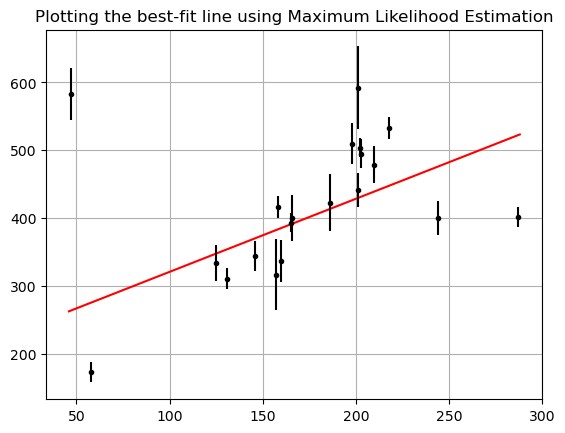

In [92]:
data = [[201,592,61,],
[244,401,25,],
[47,583,38,],
[287,402,15,],
[203,495,21,],
[58,173,15,],
[210,479,27,],
[202,504,14,],
[198,510,30,],
[158,416,16,],
[165,393,14,],
[201,442,25,],
[157,317,52,],
[131,311,16,],
[166,400,34,],
[160,337,31,],
[186,423,42,],
[125,334,26,],
[218,533,16,],
[146,344,22]]

data = np.array(data)

x = data[: , 0]
y = data[: , 1]
e = data[: , 2]

# optimizing the parameters for linear model
# disp -> indicates if message should be displayed
theta_opt = sp.optimize.fmin(MSE , [0 , 0] , args = (x , y , e) , disp = False)

# plotting the points
x_plot = np.linspace(x.min()-1 , x.max()+1 , 100)
plt.plot(x_plot , linear_model(x_plot , theta_opt) , 'r-' , label = "Linear Model")
plt.errorbar(x , y , yerr = e , fmt = 'k.')
plt.grid()
plt.title("Plotting the best-fit line using Maximum Likelihood Estimation")
plt.show()

$\underline{\text{Bayesian Analysis}}$

We shall assume our model to be the convex combination of two Gaussians, where the contribution of each Gaussian is given by a weight $g \in [0,1]$ where $g=0$ represents an outlier. Thus, our priors can simply be set to 1 if they are not outliers, else 0. If the point is an outlier, its contribution is given by a Gaussian of very high width $\sigma_B$ to nullify its effect, else we continue with our normal Gaussian Likelyhood.

In this case, the posterior can be given by:

$\Pr(x_i , y_i , e_i | \theta , \sigma_B , g_i) = \frac{g_i}{\sqrt{2\pi e_i^2}}\exp{\left(-\frac{\left(\theta_0 + \theta_1x_i - y_i\right)^2}{2e_i^2}\right)} + \frac{1 - g_i}{\sqrt{2\pi \sigma_B^2}}\exp{\left(-\frac{\left(\theta_0 + \theta_1x_i - y_i\right)^2}{2\sigma_B^2}\right)}$

We can see that if $g_i = 0$, the contribution is given by $\frac{1}{\sqrt{2\pi \sigma_B^2}}\exp{\left(-\frac{\left(\theta_0 + \theta_1x_i - y_i\right)^2}{2\sigma_B^2}\right)}$ and if $g_i = 1$, the contribution is $\frac{1}{\sqrt{2\pi e_i^2}}\exp{\left(-\frac{\left(\theta_0 + \theta_1x_i - y_i\right)^2}{2e_i^2}\right)}$

We wish to avoid taking the logarithm of this since it contains the sum of two terms, however, the emcee sampler wishes to have a function that returns the logarithm of the posterior probability.

In [93]:
def log_posterior(theta , x , y , e , sigma_B):
    '''
    Computes the posterior for a linear model considering Bayesian Analysis
    '''

    # we assume theta[0] , theta[1] are paramters for the linear model and the rest are weights for each point
    g = theta[2:]

    # any non-positive weight will imply thaat the points contribution is low(i.e outlier), so we set it to 0
    # similarly, any weight greater than 1 can be set to 1
    g = np.clip(g , 0 , 1)

    y_pred = linear_model(x , theta[:2])

    # calculating the first term
    term1 = np.exp(-(y_pred - y)**2 / 2 * e**2) * g / np.sqrt(2 * np.pi * e**2)

    # calculating the second term
    term2 = np.exp(-(y_pred - y)**2 / 2 * sigma_B**2) * (1 - g) / np.sqrt(2 * np.pi * sigma_B**2)

    # finding the posterior
    return np.log(np.product(term1 + term2))    # since the likelihood is the product of all terms

In [94]:
# we define the parameters

n_walkers = 50  # number of total chains to be generated
n_steps = 25000  # the size of each chain
n_burn = 15000   # number of steps to be discarded in the beginning to help stabilize

# we define the starting guess: we assume it to be around the MLE of the guess
theta_guess = np.random.normal(theta_opt , 1 , (n_walkers , 2))
g_guess = np.random.normal(0.5 , 0.1 , (n_walkers , len(x)))    # since g is defined to be between 0 and 1
starting_guess = np.hstack((theta_guess , g_guess))

# we define the sampler
sampler = emcee.EnsembleSampler(nwalkers = n_walkers , ndim = 2+len(x) , log_prob_fn = log_posterior , args = (x , y , e , 50))
samples = sampler.run_mcmc(starting_guess , n_steps)

/var/folders/x0/r7576wrd5w3dfxhxvxn3v81w0000gn/T/ipykernel_29555/3080660869.py:22: RuntimeWarning: divide by zero encountered in log
  return np.log(np.product(term1 + term2))    # since the likelihood is the product of all terms


In [95]:
# converting into numpy chains
chain = sampler.chain   # shape will be n_walkers x n_steps x n_dim

# we shall remove the n_burn steps
final = chain[: , n_burn : , : ].reshape(-1 , 2 + len(x))

In [96]:
# calculating the intercept and bias
theta_bayesian = np.mean(final[: , :2] , axis = 0)
g = np.mean(final[: , 2:] , axis = 0)

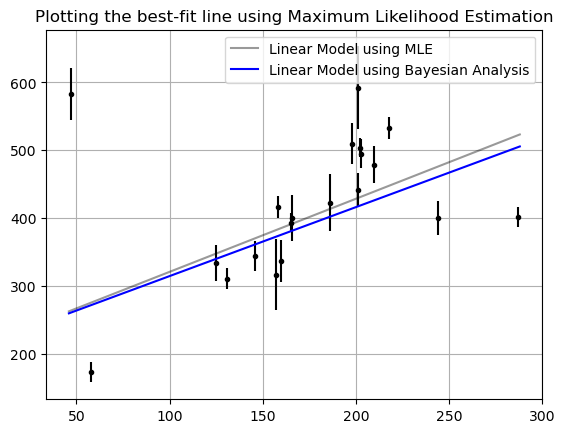

In [97]:
# plotting the points
x_plot = np.linspace(x.min()-1 , x.max()+1 , 100)
plt.plot(x_plot , linear_model(x_plot , theta_opt) , 'k-' , label = "Linear Model using MLE" , alpha = 0.4)
plt.errorbar(x , y , yerr = e , fmt = 'k.')
plt.plot(x_plot , linear_model(x_plot , theta_bayesian) , 'b-' , label = "Linear Model using Bayesian Analysis")
plt.legend()
plt.grid()
plt.title("Plotting the best-fit line using Maximum Likelihood Estimation")
plt.show()